## Observations and Insights 

- The bar graph of "total number of timepoints for each drug regimen" indicates that 
  Capomulin has the largest mice number and Zoniferol has the smallest mice number;
    
- The pie chart of "Distribution of female versus male mice" shows that 
  the number of female and male mice are roughly equal, number of mice male is slightly larger than female one;
    
- The box plot of "Tumor Volumes for each Drug Regimen" indicates that 
  Infubinol has maximum final tumor volume while Capomulin has the minimum one.
    
- The regression fitting result shows that the mice weight has a linear relationship with tumore volume, which the average tumor volume increases with the increase of mice weight. 
  The correlation coefficient is 0.84, which is a positive strong correlation.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata,study_results,on = "Mouse ID",how = "outer")

# Display the data table for preview
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_mice = len(data_complete["Mouse ID"].unique())
number_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = data_complete.loc[data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID[0]


'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = data_complete.loc[data_complete["Mouse ID"] == duplicate_mice_ID[0],:]
all_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_complete[data_complete["Mouse ID"] != duplicate_mice_ID[0]]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
number_mice = len(clean_data["Mouse ID"].unique())
number_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = clean_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std = clean_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM = clean_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.DataFrame({"Mean of tumor volume": mean, 
                                   "Median of tumor volume": median, 
                                   "Variance of tumor volume": variance, 
                                   "Standard Deviation of tumor volume": std,
                                  "SEM of tumor volume": SEM})
summary_statistics


,Mean of tumor volume,Median of tumor volume,Variance of tumor volume,Standard Deviation of tumor volume,SEM of tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Total number of timepoints for for each drug regimen')

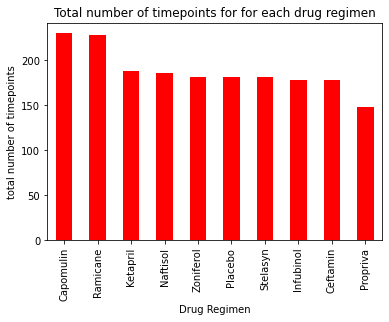

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data_timepoints = clean_data["Drug Regimen"].value_counts()
data_timepoints

plot_pandas = data_timepoints.plot.bar(color='r')  

plt.xlabel("Drug Regimen")
plt.ylabel("total number of timepoints")
plt.title("Total number of timepoints for for each drug regimen")

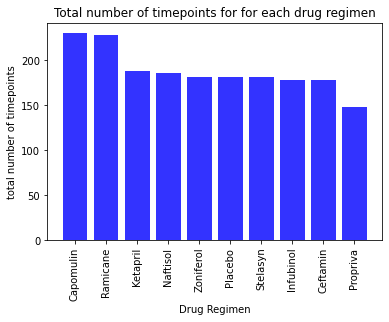

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = data_timepoints.index.values
y_axis = data_timepoints.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("total number of timepoints")
plt.title("Total number of timepoints for for each drug regimen")
plt.xticks(rotation="vertical")

plt.show()


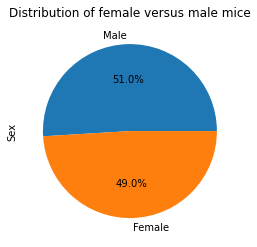

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data["Sex"].value_counts()
gender

plot_pandas = gender.plot.pie(autopct= "%1.1f%%")

plt.title("Distribution of female versus male mice")
plt.show()

([<matplotlib.patches.Wedge at 0x7feb81ce57f0>,
 [Text(-0.6814042419013431, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370962, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

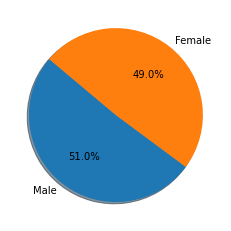

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
plt.pie(gender, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Ramicane = clean_data.loc[clean_data['Drug Regimen'] == "Ramicane"]
Infubinol = clean_data.loc[clean_data['Drug Regimen'] == "Infubinol"]
Ceftamin = clean_data.loc[clean_data['Drug Regimen'] == "Ceftamin"]
Capomulin = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]

frames = [Capomulin, Ramicane, Infubinol, Ceftamin]
four_drugs = pd.concat(frames)

group_by_ID = data_complete.groupby(["Mouse ID"])
max_time = group_by_ID["Timepoint"].max()

merged_frames = pd.merge(four_drugs,max_time, on="Mouse ID")
merged_frames["MaxTime"] = merged_frames["Timepoint_x"] == merged_frames["Timepoint_y"]

# drop all rows that do not include the max time
merged_frames.drop(merged_frames.loc[merged_frames['MaxTime']==False].index, inplace=True)

#create new df with Mouse ID, Drug Regimen, Time and Tumor Volume
time_tumor_df = merged_frames[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
time_tumor_df 

,Mouse ID,Drug Regimen,Timepoint_x,Tumor Volume (mm3)
9,s185,Capomulin,45,23.343598
19,x401,Capomulin,45,28.484033
29,m601,Capomulin,45,28.430964
34,f966,Capomulin,20,30.485985
44,u364,Capomulin,45,31.023923
...,...,...,...,...
773,x226,Ceftamin,0,45.000000
783,x581,Ceftamin,45,64.634949
793,x822,Ceftamin,45,61.386660
803,y769,Ceftamin,45,68.594745


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = time_tumor_df.loc[time_tumor_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    #print(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    #print(iqr)
   
    
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")

The outliers for Infubinol are 506    36.321346
Name: Tumor Volume (mm3), dtype: float64.


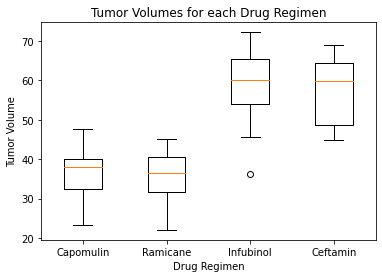

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

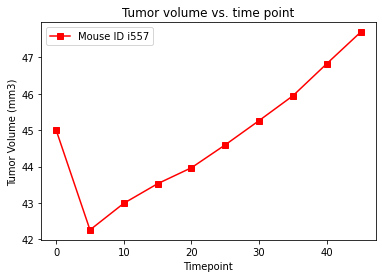

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# view Capomulin dataframe and randomly pick one mouse treated with Capomulin
Capomulin["Mouse ID"]

Mouse = Capomulin.loc[Capomulin["Mouse ID"]=="i557"]
Mouse

# get x and y axis
x = Mouse["Timepoint"]
y = Mouse["Tumor Volume (mm3)"]

plt.plot(x, y, color="r",label="Mouse ID i557",marker = "s")
plt.legend(loc="best")
plt.title("Tumor volume vs. time point")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'average tumor volume')

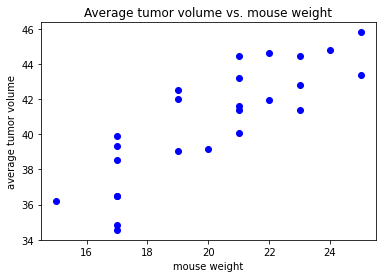

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin
y = Capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
x = Capomulin.groupby("Mouse ID").mean()["Weight (g)"]

plt.scatter(x, y, color="b",marker = "o")
# plt.legend(loc="best")
plt.title("Average tumor volume vs. mouse weight")
plt.xlabel("mouse weight")
plt.ylabel("average tumor volume")

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


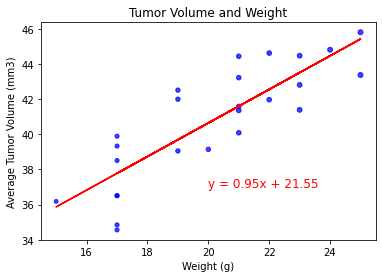

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
y = Capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
x = Capomulin.groupby("Mouse ID").mean()["Weight (g)"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", color="b",
            s=x, alpha=0.75)
plt.title("Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=12,color="red")

#print correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x,y)[0],2)}")